In [109]:
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
#from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.preprocessing import StandardScaler as SS
import re
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.decomposition import PCA
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [110]:
df=pd.read_csv('C:\\Users\\KARAN\\Desktop\\diet project\\train_data_329x19.csv')
df.drop(axis=1,labels='Unnamed: 0',inplace=True)
df.dropna(axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)
x=df.iloc[:,:13]
y=df.iloc[:,16:17]

In [111]:
print("SHAPE: ")
print("x Shape: ",x.shape)
print("y Shape: ",y.shape)

SHAPE: 
x Shape:  (325, 13)
y Shape:  (325, 1)


In [112]:
y

,pro
0,60.0
1,52.0
2,80.0
3,90.0
4,66.0
...,...
320,51.0
321,70.0
322,68.0
323,63.0


In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=None)

In [114]:
x_test.shape

(82, 13)

In [115]:
rf=RandomForestRegressor(n_estimators=1000,max_depth=5,criterion='absolute_error')
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor(n_estimators=200,max_depth=3,loss='huber',alpha=0.4,criterion='squared_error',learning_rate=0.1)
svr=SVR()
dtr=DecisionTreeRegressor(criterion='squared_error',max_depth=4)

In [116]:
ss=SS()

# synthetic data

In [117]:
from sdv.tabular import GaussianCopula

In [118]:
model = GaussianCopula(
    field_distributions={
        'weight': 'gamma',
        'UREA': 'gaussian_kde',
        #'HB': 'gaussian_kde',
        'K': 'truncated_gaussian',
        #'HBA1C': 'gaussian_kde',
        #'SGOT': 'gaussian_kde',
        'SGPT': 'gaussian_kde',

    }
)
model.fit(df)
# dropping ['patient_gender','HB','FBS','HBA1C','SGOT']

In [119]:
sample = model.sample(700)
sample.head()

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
0,31.0,1,153.5,62.19,13.99,110.04,2.13,134.0,3.79,84.0,5.02,19.7,25.03,1310.0,251.7,24.1,62.0,111.5,7.0
1,31.0,0,156.8,57.63,11.38,105.14,1.39,131.0,4.08,98.0,4.74,33.9,25.65,1674.0,349.9,25.9,57.0,71.7,7.0
2,47.0,1,156.0,53.28,12.07,91.32,1.25,132.0,4.28,90.0,5.78,25.5,32.34,1211.0,175.4,22.5,53.0,305.2,6.0
3,51.0,0,153.5,53.84,14.08,98.47,0.97,138.0,4.04,91.0,8.00,11.1,21.54,1785.0,310.6,30.5,60.0,162.8,7.0
4,72.0,0,158.8,53.18,12.47,101.60,2.05,133.0,4.02,85.0,6.62,42.4,36.83,1015.0,167.9,16.7,51.0,51.3,5.0


array([[<AxesSubplot:title={'center':'patient_age'}>,
        <AxesSubplot:title={'center':'patient_gender'}>,
        <AxesSubplot:title={'center':'Ht'}>,
        <AxesSubplot:title={'center':'Wt'}>],
       [<AxesSubplot:title={'center':'HB'}>,
        <AxesSubplot:title={'center':'UREA'}>,
        <AxesSubplot:title={'center':'CR'}>,
        <AxesSubplot:title={'center':'Na'}>],
       [<AxesSubplot:title={'center':'K'}>,
        <AxesSubplot:title={'center':'FBS'}>,
        <AxesSubplot:title={'center':'HBA1C'}>,
        <AxesSubplot:title={'center':'SGOT'}>],
       [<AxesSubplot:title={'center':'SGPT'}>,
        <AxesSubplot:title={'center':'calories'}>,
        <AxesSubplot:title={'center':'cho'}>,
        <AxesSubplot:title={'center':'Fat'}>],
       [<AxesSubplot:title={'center':'pro'}>,
        <AxesSubplot:title={'center':'fluids'}>,
        <AxesSubplot:title={'center':'NA'}>, <AxesSubplot:>]],
      dtype=object)

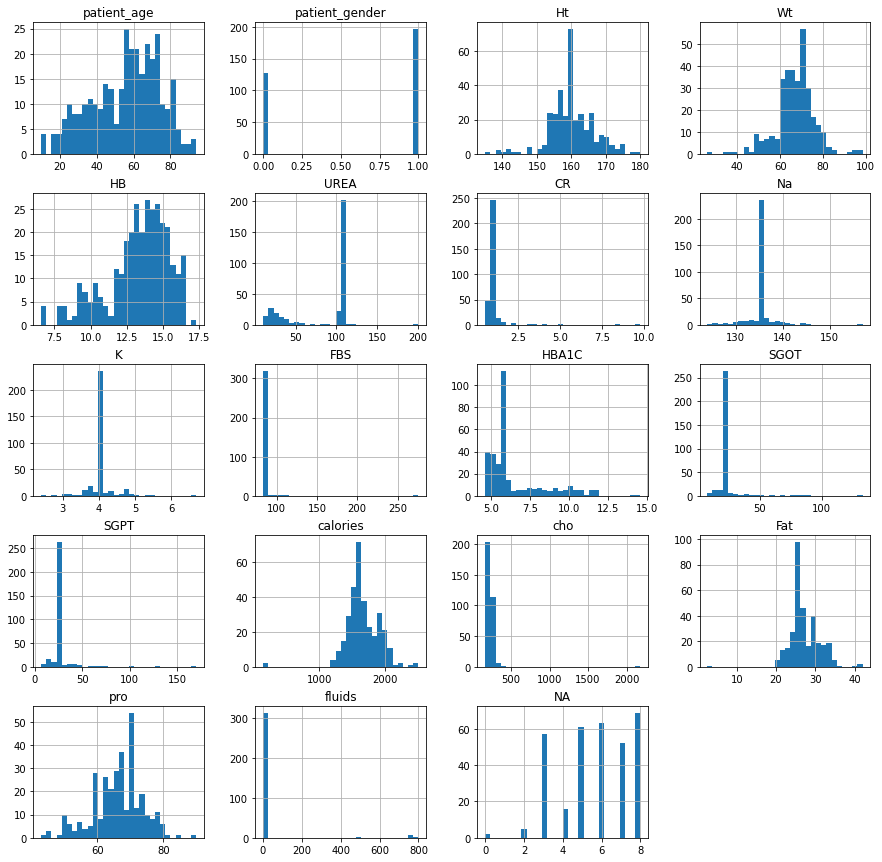

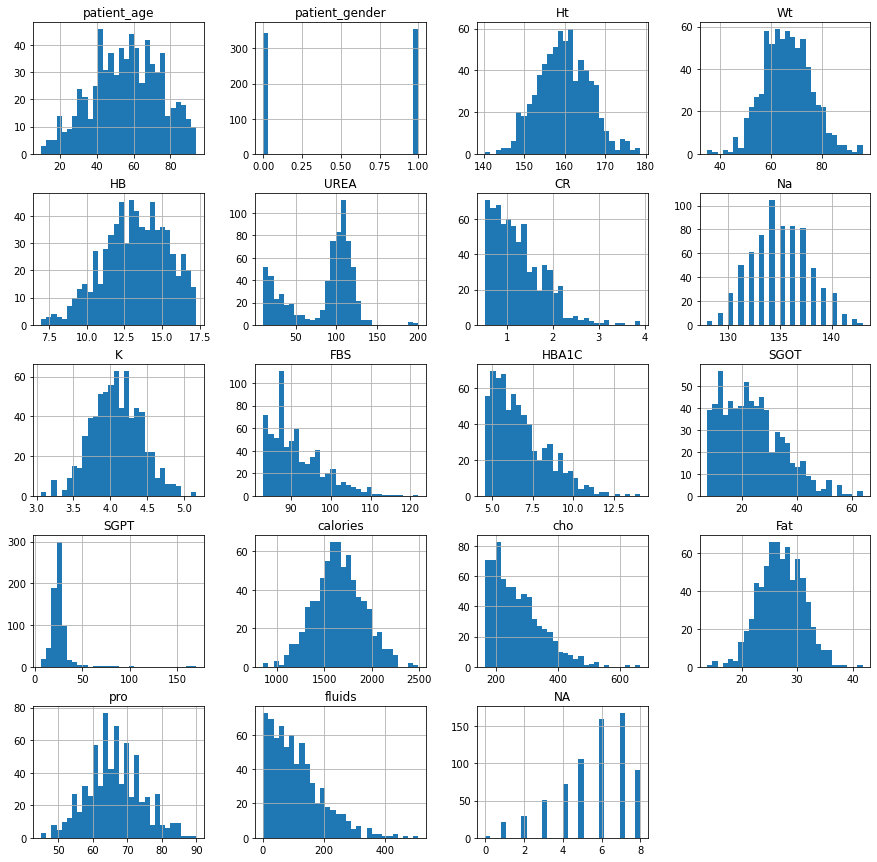

In [120]:
df.hist(bins=30, figsize=(15, 15))
sample.hist(bins=30, figsize=(15, 15))

## weight,hb,UREA*,k,HBA1C*,SGOT*,SGPT*,NA have inconsistant values

## FIxed inconsistency in weight,hb,UREA*,k,HBA1C*,SGOT*,SGPT* creation

In [121]:
df.describe()

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.00000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,55.652308,0.606154,159.876615,66.876862,13.294492,84.096277,1.038708,134.978462,4.088862,83.846154,6.49280,24.186154,26.158954,1659.036923,235.395385,27.226154,66.273846,29.055692,5.673846
std,18.460478,0.489355,6.428141,9.200941,2.177099,36.993946,0.794877,2.754821,0.350768,10.946321,1.91834,10.665496,12.622462,247.451152,112.675699,3.823283,7.452448,136.173058,1.828637
min,10.000000,0.000000,135.000000,25.900000,6.580000,10.000000,0.530000,124.000000,2.400000,83.000000,4.60000,7.500000,6.700000,150.000000,164.000000,2.500000,43.000000,1.000000,0.000000
25%,43.000000,0.000000,156.000000,63.000000,12.300000,41.400000,0.860000,135.000000,4.100000,83.000000,5.29000,22.800000,24.800000,1520.000000,209.000000,25.000000,62.000000,2.500000,5.000000
50%,58.000000,1.000000,160.000000,68.000000,13.700000,106.040000,0.890000,135.000000,4.100000,83.000000,5.80000,22.800000,24.800000,1610.000000,221.000000,26.800000,67.000000,2.900000,6.000000
75%,70.000000,1.000000,163.500000,71.700000,14.800000,106.970000,0.960000,135.000000,4.100000,83.000000,6.97000,22.800000,24.800000,1820.000000,250.000000,30.000000,70.000000,3.000000,7.000000
max,94.000000,1.000000,180.000000,98.500000,17.300000,200.700000,9.780000,157.000000,6.700000,276.000000,14.60000,133.000000,170.000000,2500.000000,2180.000000,42.000000,90.000000,800.000000,8.000000


In [122]:
sample.describe()

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT,calories,cho,Fat,pro,fluids,NA
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,56.152857,0.508571,159.800143,66.286543,13.230229,83.738343,1.261343,134.855714,4.087686,91.595714,6.784500,23.862857,26.055557,1650.415714,268.352429,27.071143,66.030000,111.772857,5.591429
std,18.548727,0.500284,6.359008,9.410672,2.134938,39.107666,0.556130,2.837625,0.336663,6.733703,1.666133,10.935278,13.777530,256.381930,79.850903,3.936175,7.831959,86.225782,1.825408
min,10.000000,0.000000,140.400000,35.140000,6.990000,10.000000,0.530000,128.000000,3.060000,83.000000,4.600000,7.500000,6.700000,855.000000,164.200000,13.800000,45.000000,1.100000,0.000000
25%,43.000000,0.000000,155.400000,59.817500,11.805000,44.295000,0.820000,133.000000,3.850000,86.000000,5.460000,15.075000,21.257500,1486.000000,205.700000,24.375000,61.000000,44.225000,4.750000
50%,57.000000,1.000000,159.750000,65.950000,13.295000,99.385000,1.150000,135.000000,4.085000,90.000000,6.430000,22.500000,24.695000,1644.000000,251.400000,27.050000,66.000000,94.950000,6.000000
75%,70.000000,1.000000,164.300000,72.627500,14.867500,110.952500,1.582500,137.000000,4.320000,95.000000,7.745000,30.850000,27.695000,1817.250000,312.900000,29.900000,71.000000,155.425000,7.000000
max,94.000000,1.000000,178.700000,95.870000,17.260000,200.700000,3.910000,143.000000,5.170000,122.000000,14.120000,63.800000,170.000000,2491.000000,665.800000,41.800000,90.000000,507.900000,8.000000


In [123]:
sample_x=sample.iloc[:,:13]
sample_y=sample.iloc[:,16:17]

In [124]:
frames_x = [sample_x,x_train]
frames_y = [sample_y,y_train]

In [125]:
result_x = pd.concat(frames_x)
result_y = pd.concat(frames_y)

In [126]:
result_x.shape
result_y.shape

(943, 1)

In [127]:
rf.fit(result_x,result_y.values.ravel())
ab.fit(result_x,result_y.values.ravel())
gb.fit(result_x,result_y.values.ravel())
svr.fit(result_x,result_y.values.ravel())
dtr.fit(result_x,result_y.values.ravel())

DecisionTreeRegressor(max_depth=4)

In [128]:
print("TRAIN ACC:")
print('RandomForest acc: ',rf.score(result_x,result_y.values.ravel()))
print('AdaBoost acc: ',ab.score(result_x,result_y.values.ravel()))
print('GradientBoost acc: ',gb.score(result_x,result_y.values.ravel()))
print("SVR acc: ",svr.score(result_x,result_y.values.ravel()))
print("DTR acc: " ,dtr.score(result_x,result_y.values.ravel()))


TRAIN ACC:
RandomForest acc:  0.7528970868163198
AdaBoost acc:  0.6881587751325347
GradientBoost acc:  0.8106439893406979
SVR acc:  0.4255156860897411
DTR acc:  0.6921430967672295


In [129]:
print("DTR acc: ", dtr.score(ss.fit_transform(x_test),ss.fit_transform(y_test)))
print("TEST ACC:")
print('RandomForest acc: ',rf.score(x_test,y_test.values.ravel()))
print('AdaBoost acc: ',ab.score(x_test,y_test.values.ravel()))
print('GradientBoost acc: ',gb.score(x_test,y_test.values.ravel()))
print("SVR acc: ",svr.score(x_test,y_test.values.ravel()))
print("DTR acc: " ,dtr.score(x_test,y_test.values.ravel()))

DTR acc:  -5475.999999999996
TEST ACC:
RandomForest acc:  0.7643285401397435
AdaBoost acc:  0.591001221774442
GradientBoost acc:  0.7099309432531948
SVR acc:  0.4002004837060593
DTR acc:  0.7122627389506706


c:\Users\KARAN\AppData\Local\Programs\Orange\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


# feature selection


In [130]:
#rfe=RFE(gb,n_features_to_select=None)
#rfe.fit(x_train,y_train)

In [131]:
#rfe.ranking_
# 1 arrayarray([1, 8, 1, 1, 5, 2, 3, 1, 1, 6, 4, 7, 1]) #FEATURE SELECTION OF ORIGINAL DATASET (PRIORITY)
# 2 arrayarray([1, 8, 4, 1, 1, 2, 1, 7, 6, 1, 3, 5, 1]) #feature selection of synthetic dataset  

In [132]:
result_x

,patient_age,patient_gender,Ht,Wt,HB,UREA,CR,Na,K,FBS,HBA1C,SGOT,SGPT
0,31.0,1,153.5,62.19,13.99,110.04,2.13,134.0,3.79,84.0,5.02,19.7,25.03
1,31.0,0,156.8,57.63,11.38,105.14,1.39,131.0,4.08,98.0,4.74,33.9,25.65
2,47.0,1,156.0,53.28,12.07,91.32,1.25,132.0,4.28,90.0,5.78,25.5,32.34
3,51.0,0,153.5,53.84,14.08,98.47,0.97,138.0,4.04,91.0,8.00,11.1,21.54
4,72.0,0,158.8,53.18,12.47,101.60,2.05,133.0,4.02,85.0,6.62,42.4,36.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,10.0,1,138.0,38.90,11.90,106.22,0.89,135.0,4.10,83.0,5.97,22.8,24.80
210,23.0,0,156.0,60.00,13.77,106.15,0.92,135.0,4.10,83.0,5.38,22.8,24.80
179,72.0,1,161.0,69.50,13.62,106.27,0.89,135.0,4.10,83.0,5.80,22.8,24.80
123,55.0,1,164.0,71.80,10.30,23.10,1.13,134.0,3.70,83.0,5.80,22.8,24.80


In [133]:
result_x.drop(axis=1,labels=['patient_gender','FBS','HBA1C','SGOT'],inplace=True)
x_test.drop(axis=1,labels=['patient_gender','FBS','HBA1C','SGOT'],inplace=True)


In [134]:
result_x.shape

(943, 9)

In [135]:
rf=RandomForestRegressor(n_estimators=1000,max_depth=5,criterion='absolute_error')
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor(n_estimators=200,max_depth=4,loss='huber',criterion='squared_error',learning_rate=0.11)
svr=SVR()
dtr=DecisionTreeRegressor(criterion='squared_error',max_depth=4)

In [136]:
#lr.fit(result_x,result_y.values.ravel())
#en.fit(result_x,result_y.values.ravel())
rf.fit(result_x,result_y.values.ravel())
ab.fit(result_x,result_y.values.ravel())
gb.fit(result_x,result_y.values.ravel())
#pca.fit(result_x,result_y.values.ravel())
#lda.fit(x_tr,y_tr.values.reshape(-1,1))
#gpr.fit(result_x,result_y.values.ravel())
svr.fit(result_x,result_y.values.ravel())

SVR()

## Train acc on synthetic dataset after fs


In [137]:
#print('LR acc: ',lr.score(result_x,result_y.values.ravel()))
#print('ElasticNet acc: ',en.score(result_x,result_y.values.ravel()))
print('RandomForest acc: ',rf.score(result_x,result_y.values.ravel()))
print('AdaBoost acc: ',ab.score(result_x,result_y.values.ravel()))
print('GradientBoost acc: ',gb.score(result_x,result_y.values.ravel()))
#print("PCA acc: ",pca.score(result_x,result_y.values.ravel()))
#print("GPR acc: ",gpr.score(result_x,result_y.values.ravel()))
print("SVR acc: ",svr.score(result_x,result_y.values.ravel()))

RandomForest acc:  0.7504867236300063
AdaBoost acc:  0.6955503579197562
GradientBoost acc:  0.9401396670468203
SVR acc:  0.4640517300504515


# Test accuracy on actual dataset 


In [138]:
#print('LR acc: ',lr.score(x_test,y_test.values.ravel()))
#print('ElasticNet acc: ',en.score(x_test,y_test.values.ravel()))
print('RandomForest acc: ',rf.score(x_test,y_test.values.ravel()))
print('AdaBoost acc: ',ab.score(x_test,y_test.values.ravel()))
print('GradientBoost acc: ',gb.score(x_test,y_test.values.ravel()))
#print("PCA acc: ",pca.score(x_test,y_test.values.ravel()))
#print("GPR acc: ",gpr.score(x_test,y_test.values.ravel()))
print("SVR acc: ",svr.score(x_test,y_test.values.ravel()))

RandomForest acc:  0.7576035278659718
AdaBoost acc:  0.6033113275630784
GradientBoost acc:  0.7366718777051255
SVR acc:  0.44282500563276694


In [139]:
'''
for i in range(1,10):
    
    print(i)
    gb=GradientBoostingRegressor(n_estimators=200,max_depth=4,loss='huber',alpha=0.4,learning_rate=0.11)
    gb.fit(result_x,result_y.values.ravel())
    print("Train = ",gb.score(result_x,result_y.values.ravel()))
    print("Test = " ,gb.score(x_test,y_test.values.ravel()))
'''

'\nfor i in range(1,10):\n    \n    print(i)\n    gb=GradientBoostingRegressor(n_estimators=200,max_depth=4,loss=\'huber\',alpha=0.4,learning_rate=0.11)\n    gb.fit(result_x,result_y.values.ravel())\n    print("Train = ",gb.score(result_x,result_y.values.ravel()))\n    print("Test = " ,gb.score(x_test,y_test.values.ravel()))\n'

##### THE TEST ACC IS SOMETIMES HIGHER AS FEATURE SELECTION WAS DONE BASED ON THE ORIGINAL DATASET, THEREFORE SYNTHETIC DATASET PERFORMS WITH LOWER ACCURACY BUT GIVES HIGH ON TEST

In [140]:

#print('LR acc: ',metrics.mean_squared_error(y_test,lr.predict(x_test))**0.5)
#print('ElasticNet acc: ',metrics.mean_squared_error(y_test,en.predict(x_test))**0.5)
print('RandomForest acc: ',metrics.mean_squared_error(y_test,rf.predict(x_test))**0.5)
print('AdaBoost acc: ',metrics.mean_squared_error(y_test,ab.predict(x_test))**0.5)
print('GradientBoost acc: ',metrics.mean_squared_error(y_test,gb.predict(x_test))**0.5)
#print("GPR acc: ",metrics.mean_squared_error(y_test,gpr.predict(x_test)**0.5))
print("SVR acc: ",metrics.mean_squared_error(y_test,svr.predict(x_test)**0.5))

RandomForest acc:  3.6150630788444604
AdaBoost acc:  4.624636812604714
GradientBoost acc:  3.767917224614906
SVR acc:  3400.5902891085743
